In [ ]:
"""
I've never used SQL before, so this is just trial and error for loading things right now.

This is just for helping me think and plan the steps.
"""
print('')

In [1]:
import pandas as pd
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.width', 10000)
# pd.set_option('display.expand_frame_repr', False)
import sqlite3

In [2]:
connection = sqlite3.connect("data/bam-crowd-only.sqlite")

In [3]:
c = connection.cursor()

In [4]:
# c.execute(
#     "CREATE TABLE modules (mid int primary key, project_id int, src text, mature_content boolean, license text)"
# )

In [5]:
# cats = c.execute(
#     'select "<img src=""" || src || """ height=200>" from modules, crowd_labels where modules.id = crowd_labels.mid and attribute = "content_cat" and label="positive" limit 100'
# )

In [ ]:
# cursor = connection.execute('select * from scores')

In [ ]:
# names = list(map(lambda x: x[0], cursor.description))

In [ ]:
names

In [75]:
df = pd.read_sql("select * from crowd_labels",
                  connection,
                  index_col="mid")

In [77]:
df['attribute']

mid
2588676      content_building
146997253    content_building
15663110     content_building
15663114     content_building
2588684      content_building
127860749    content_building
49638061     content_building
198049809    content_building
13303827     content_building
2752532      content_building
48332821     content_building
54023513     content_building
48332833     content_building
71898459     content_building
89489447     content_building
167575595    content_building
73891885     content_building
76240533     content_building
6422577      content_building
173801523    content_building
126091317    content_building
89718839     content_building
89718841     content_building
159645757    content_building
81952831     content_building
120591713    content_building
111771723    content_building
92602445     content_building
171278415    content_building
171278417    content_building
                   ...       
47964109     media_watercolor
143873357    media_watercolor
150937

In [ ]:
# pd.read_sql(
#     r'select "<img src=""" || src || """ height=200>" from modules, crowd_labels where modules.id = crowd_labels.mid and attribute = "content_cat" and label="positive" limit 100;', 
#     connection
# )

In [4]:
urls = pd.read_sql(
    "select * from modules limit 100",
    connection
)

In [5]:
urls.head()#['src']#[1]

mid  project_id                                                src  \
0   489       40030  https://mir-s3-cdn-cf.behance.net/project_modu...   
1  1004       40040  https://mir-s3-cdn-cf.behance.net/project_modu...   
2  1053       40041  https://mir-s3-cdn-cf.behance.net/project_modu...   
3  1065       40041  https://mir-s3-cdn-cf.behance.net/project_modu...   
4  1067       40043  https://mir-s3-cdn-cf.behance.net/project_modu...   

   mature_content   license  
0               0  cc by-nc  
1               0  cc by-nc  
2               0  cc by-nc  
3               0  cc by-nc  
4               0  cc by-nc

In [6]:
scores = pd.read_sql("select * from scores",
                  connection,
                  index_col="mid")

In [65]:
urls['src'][1]

'https://mir-s3-cdn-cf.behance.net/project_modules/disp/8f69a81004.55f726597e324.jpg'

In [35]:
urls['src'][3]

'https://mir-s3-cdn-cf.behance.net/project_modules/disp/a9e0f21065.55f7265cdb7b3.jpg'

In [16]:
scores.head()

content_bicycle  content_cat  content_tree  emotion_scary  \
mid                                                               
489         -8.194265   -13.083484     -0.140162     -10.125443   
1004        -5.908639    -9.379574     -4.740625      -4.781479   
1053        -8.682774   -23.007246     -9.073513      -3.692783   
1065        -7.429687    -9.030757     -3.102335      -3.109094   
1067        -6.541219    -9.875690     -6.983145      -4.812078   

      media_oilpaint  content_bird  content_dog  emotion_gloomy  \
mid                                                               
489        -8.102950     -6.825498    -5.438437       -5.251916   
1004       -9.769642     -7.481776    -5.466529       -1.939304   
1053       -6.789311    -11.664145    -9.459610       -1.498988   
1065       -7.122383     -5.884630    -6.339474       -0.523028   
1067       -8.474461     -6.800467    -4.610362       -3.240254   

      media_3d_graphics  media_pen_ink  content_building  content_flower  \
mid                                                                        
489          -13.048631     -10.792016         -1.033735       -6.437519   
1004         -10.137968      -9.929028         -2.769971       -1.974876   
1053          -8.926823      -8.929226         -2.258289      -15.922831   
1065          -6.108827      -8.709348         -0.526354       -9.055132   
1067          -9.403267      -7.462641         -2.133614      -10.881371   

      emotion_happy  media_comic  media_vectorart  content_cars  \
mid                                                               
489       -0.784109   -13.372336       -10.279009     -4.741513   
1004      -5.214772    -9.871041        -9.538937     -8.715858   
1053      -4.624222    -7.796127        -8.575558     -5.678706   
1065      -5.766580    -9.137621        -8.250728     -3.525297   
1067      -1.745344    -8.060266        -8.906570     -4.348733   

      content_people  emotion_peaceful  media_graphite  media_watercolor  
mid                                                                       
489        -0.372203         -0.295248      -11.520514        -11.912029  
1004       -0.110869         -3.770542       -8.218750        -17.242306  
1053       -0.052687         -3.624131       -9.731888        -18.276842  
1065       -1.939328         -3.715596       -7.905422        -16.156538  
1067       -0.225947         -3.466125       -7.940952        -14.413774

In [41]:
scores2 = pd.read_sql("select * from crowd_raw_captions",
                  connection,
                  index_col="mid")

In [13]:
#scores2

In [67]:
import urllib.request 
urllib.request.urlretrieve("http://www.gunnerkrigg.com//comics/00000001.jpg", "images/00000001.jpg")

('00000001.jpg', <http.client.HTTPMessage at 0x113105780>)

In [7]:
import urllib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
url = "http://s0.geograph.org.uk/photos/40/57/405725_b17937da.jpg"
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

In [69]:
urllib.request.urlretrieve(url, "images/00000002.jpg")

('images/00000002.jpg', <http.client.HTTPMessage at 0x113105630>)

In [14]:
url2 = "https://mir-s3-cdn-cf.behance.net/project_modules/disp/a9e0f21065.55f7265cdb7b3.jpg"
url_response2 = urllib.request.urlopen(url2)
img_array2 = np.array(bytearray(url_response2.read()), dtype=np.uint8)

In [73]:
getsizeof(img_array2)

38772

In [66]:
url_dead = "https://mir-cdn.behance.net/v1/rendition/project_modules/disp/8f69a81004.55f726597e324.jpg"
url_dead_response = urllib.request.urlopen(url_dead)

HTTPError: HTTP Error 404: Not Found

In [74]:
urllib.request.urlretrieve(url_dead, "images/00000002.jpg")

HTTPError: HTTP Error 404: Not Found

In [26]:
img = cv2.imdecode(img_array, -1)
img2 = cv2.imdecode(img_array2, -1)
resized_img = cv2.resize(img, (128,128))
resized_img2 = cv2.resize(img2, (128,128))

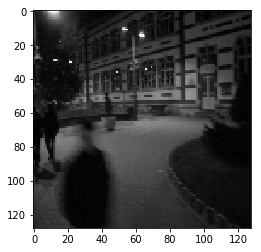

In [24]:
# cv2.imshow('URL Image', img)
# plt.show()
plt.imshow(resized_img2)
plt.show()

In [55]:
# reshaped_img = resized_img.reshape(resized_img.shape + (1,))
# reshaped_img2 = resized_img2.reshape(resized_img2.shape + (1,))
# reshaped_img = np.reshape(resized_img,  + (1,))

reshaped_img = resized_img.reshape((1, 128,128, 3))
reshaped_img2 = resized_img2.reshape((1, 128,128, 3))

resized_img.shape

(128, 128, 3)

In [61]:
final_shape = np.concatenate((reshaped_img, reshaped_img2), axis=0)
final_shape.shape

(2, 128, 128, 3)

In [63]:
final_shape[0, :, :, :].shape

(128, 128, 3)

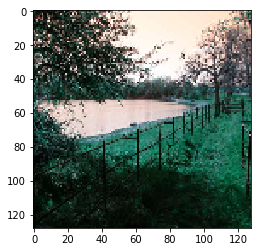

In [64]:
plt.imshow(final_shape[0])
plt.show()

In [42]:
#all_img = np.dstack((resized_img, resized_img2))

#all_img = np.concatenate((resized_img, resized_img2), axis=-1)

all_img = np.vstack((resized_img, resized_img2))
all_img.shape

(256, 128, 3)

In [20]:
print (img.shape)
print (img2.shape)


(480, 640, 3)
(412, 550, 3)


In [72]:
from sys import getsizeof

getsizeof(img)

921728

In [7]:
getsizeof(img_array)

63802

In [8]:
getsizeof(url_response)

56

In [12]:
img_array.shape

(63706,)

In [13]:
img.shape

(480, 640, 3)

In [14]:
480 * 640 * 3

921600